In [1]:
# embed hero data
# to investigate clustering, if any

# parameters: heroId, XPM, GPM, kills, deaths, assists, game duration

# may others can be added

In [2]:
import pandas as pd
import json
import glob
import datetime
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rcParams.update({'font.size': 16})

In [4]:
def convert_time(s):
    return datetime.datetime.fromtimestamp(s).strftime('%Y-%m-%d %H:%M:%S.%f')

In [5]:
def read_json_file(filename):
    with open(filename, "r") as f:
        return json.load(f)

In [6]:
hero_map = pd.read_json("hero_map.json")
hero_map.set_index('idx', inplace=True)

In [7]:
hero_map.loc[64].values[0]

'Jakiro'

In [8]:
filenames = glob.glob("stratz_match_data_2021_2022_tour_1/*")

In [9]:
filenames

['stratz_match_data_2021_2022_tour_1/NA.json',
 'stratz_match_data_2021_2022_tour_1/SEA.json',
 'stratz_match_data_2021_2022_tour_1/EEU.json',
 'stratz_match_data_2021_2022_tour_1/SA.json',
 'stratz_match_data_2021_2022_tour_1/WEU.json',
 'stratz_match_data_2021_2022_tour_1/CN.json']

In [10]:
data = {}
for filename in filenames:
    key = filename.split("/")[-1].split(".")[0]
    data[key] = read_json_file(filename)

In [11]:
hero_map.loc[71]

hero    Spirit Breaker
Name: 71, dtype: object

In [12]:
data["NA"]["data"]["league"]['matches'][0]['id']

6388378756

In [13]:
np.sum(data["NA"]["data"]["league"]['matches'][0]['stats']['radiantKills'])

36

In [14]:
np.sum(data["NA"]["data"]["league"]['matches'][0]['stats']['direKills'])

14

In [15]:
len(data["NA"]["data"]["league"]['matches'][0]['stats']['direKills'])

37

In [16]:
data["NA"]["data"]["league"]['matches'][0]['stats']['pickBans'][4]

{'heroId': 71,
 'isPick': True,
 'order': 4,
 'playerIndex': 0,
 'team': None,
 'wasBannedSuccessfully': None}

In [17]:
data["NA"]["data"]["league"]['matches'][0]['players'][0]['heroId']

71

In [18]:
data["NA"]["data"]["league"]['matches'][0]['players'][0]['goldPerMinute']

423

In [19]:
data["NA"]["data"]["league"]['matches'][0]['players'][0]['experiencePerMinute']

570

In [48]:
data["NA"]["data"]["league"]['matches'][0]['players'][0]

{'matchId': 6388378756,
 'playerSlot': 0,
 'steamAccountId': 84429681,
 'isRadiant': True,
 'isVictory': True,
 'heroId': 71,
 'gameVersionId': 149,
 'kills': 9,
 'deaths': 5,
 'assists': 19,
 'leaverStatus': 0,
 'numLastHits': 138,
 'numDenies': 11,
 'goldPerMinute': 423,
 'networth': 13010,
 'experiencePerMinute': 570,
 'level': 21,
 'gold': 1105,
 'goldSpent': 14530,
 'heroDamage': 15733,
 'towerDamage': 1010,
 'heroHealing': 0,
 'partyId': None,
 'isRandom': False,
 'lane': 3,
 'streakPrediction': None,
 'intentionalFeeding': False,
 'role': 0,
 'roleBasic': 0,
 'imp': 1,
 'award': 2,
 'item0Id': 50,
 'item1Id': 178,
 'item2Id': 36,
 'item3Id': 90,
 'item4Id': 123,
 'item5Id': 21,
 'backpack0Id': None,
 'backpack1Id': None,
 'backpack2Id': None,
 'neutral0Id': 331,
 'behavior': None}

# to start lets just plot the heros in a 2D space of XPM and GPM

In [20]:
def get_rows_df(data_matches, region):
    
    cols = ['heroId', 'gpm', 'xpm', 'matchid']
    rows = []
    for i, m in enumerate(data_matches):
        matchId = m['id']
        for j, p in enumerate(m['players']):
            heroId = p['heroId']
            gpm = p['goldPerMinute']
            xpm = p['experiencePerMinute']
            row = [heroId, gpm, xpm, matchId]
            rows.append(row)
    
    df = pd.DataFrame(rows, columns=cols)
    return df

In [21]:
dfs = []
for k in data.keys():
    print(f"region: {k}")
    dfs.append(get_rows_df(data[k]["data"]["league"]['matches'], k))
df = pd.concat(dfs)

df = df.merge(hero_map, 'inner', left_on='heroId', right_index=True)

region: NA
region: SEA
region: EEU
region: SA
region: WEU
region: CN


In [22]:
df

heroId  gpm  xpm     matchid                 hero
0        71  423  570  6388378756       Spirit Breaker
63       71  469  694  6386471600       Spirit Breaker
102      71  484  661  6379542196       Spirit Breaker
120      71  502  686  6379341459       Spirit Breaker
253      71  284  403  6366953361       Spirit Breaker
..      ...  ...  ...         ...                  ...
145      90  253  344  6378927992  Keeper of the Light
651      14  561  619  6300641208                Pudge
673      14  190  234  6299515051                Pudge
566      67  421  502  6363782701              Spectre
625      67  370  400  6358593165              Spectre

[4190 rows x 5 columns]

In [23]:
df.sort_values(by='gpm', ascending=False).head(10)

heroId  gpm  xpm     matchid              hero
321      46  975  783  6334151104  Templar Assassin
119      89  974  706  6388414051        Naga Siren
332      48  949  708  6333794814              Luna
286      94  939  871  6369035961            Medusa
477      89  938  658  6316023937        Naga Siren
146      44  920  744  6376373759  Phantom Assassin
359      72  920  815  6364996213        Gyrocopter
375      94  915  815  6328171603            Medusa
553      48  909  739  6310069641              Luna
591      25  901  739  6358912024              Lina

In [24]:
df.sort_values(by='xpm', ascending=False).head(10)

heroId  gpm  xpm     matchid              hero
198      46  811  978  6372302305  Templar Assassin
668      46  858  959  6299611972  Templar Assassin
136      74  701  954  6379254709           Invoker
676     106  699  941  6299750006      Ember Spirit
149     126  632  939  6381519516       Void Spirit
360      23  775  936  6371416645            Kunkka
156      44  883  927  6378692936  Phantom Assassin
394      46  820  926  6330778962  Templar Assassin
133      13  839  923  6376497191              Puck
87        1  763  923  6384544680         Anti-Mage

In [25]:
df.sort_values(by='gpm', ascending=True).head(10)

heroId  gpm  xpm     matchid           hero
97       91  122   50  6392793741             Io
99      128  122   50  6392793741       Snapfire
95      114  122   50  6392793741    Monkey King
96       49  122   50  6392793741  Dragon Knight
98       17  122   50  6392793741   Storm Spirit
307      42  123   68  6368962336    Wraith King
308     121  123   57  6368962336     Grimstroke
305       3  123  199  6368962336           Bane
306      97  123  180  6368962336         Magnus
309      16  124   57  6368962336      Sand King

In [26]:
df.sort_values(by='xpm', ascending=True).head(20)

heroId  gpm  xpm     matchid           hero
98       17  122   50  6392793741   Storm Spirit
93       26  135   50  6392793741           Lion
92       61  135   50  6392793741    Broodmother
96       49  122   50  6392793741  Dragon Knight
97       91  122   50  6392793741             Io
94       63  135   50  6392793741         Weaver
90        4  135   50  6392793741    Bloodseeker
95      114  122   50  6392793741    Monkey King
91       13  135   50  6392793741           Puck
99      128  122   50  6392793741       Snapfire
455      21  144   53  6326506181     Windranger
452     121  124   53  6326506181     Grimstroke
451     107  124   55  6326506181   Earth Spirit
300      86  135   56  6368962336         Rubick
303     129  135   56  6368962336           Mars
308     121  123   57  6368962336     Grimstroke
309      16  124   57  6368962336      Sand King
457      34  144   67  6326506181         Tinker
307      42  123   68  6368962336    Wraith King
454      38  124   80  6326506181    Beastmaster

In [27]:
df[df['xpm'] <= 100]['matchid'].unique()

array([6368962336, 6392793741, 6326506181])

In [28]:
unique_match_ids = df['matchid'].unique()

In [29]:
# somme matches are bugged and don't have accurate information
bugged_matches = [6368962336, 6392793741, 6326506181]

Text(0, 0.5, 'xpm')

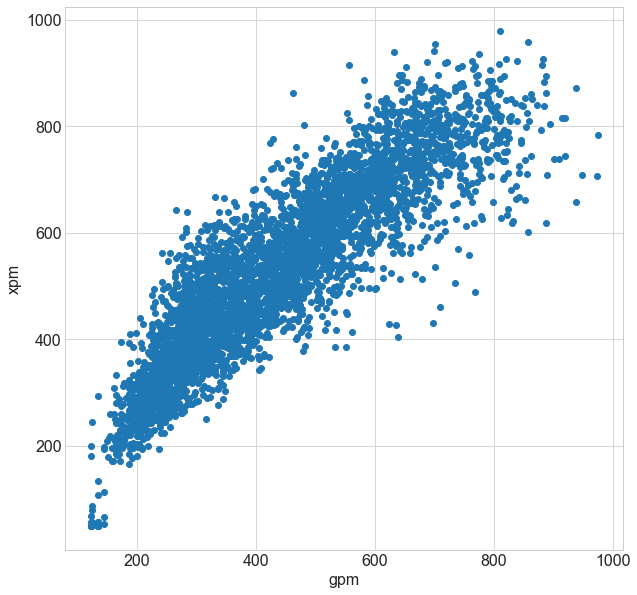

In [30]:
plt.figure(figsize=(10,10))
plt.plot(df['gpm'], df['xpm'], 'o')
plt.xlabel("gpm")
plt.ylabel("xpm")

In [31]:
mask_bugged_matches = df['matchid'].isin(bugged_matches)

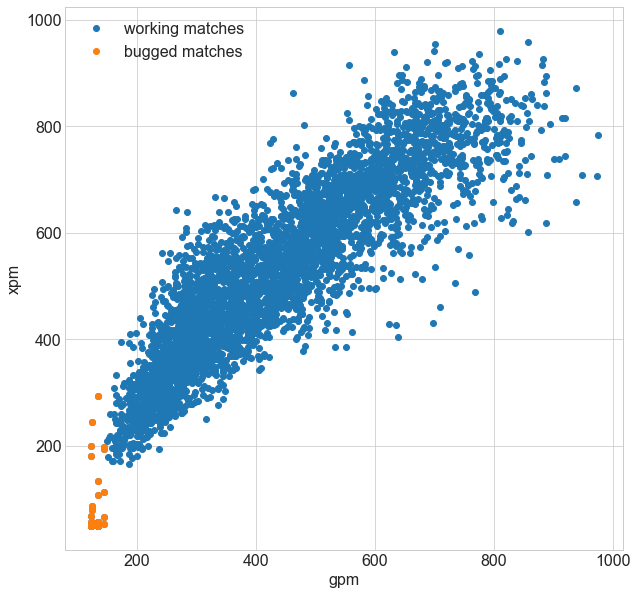

In [32]:
plt.figure(figsize=(10,10))
plt.plot(df['gpm'], df['xpm'], 'o', label='working matches')
plt.plot(df[mask_bugged_matches]['gpm'], df[mask_bugged_matches]['xpm'], 'o', label='bugged matches')
plt.xlabel("gpm")
plt.ylabel("xpm")
plt.legend()

In [33]:
# only keep non-bugged
df = df[~mask_bugged_matches]

Text(0, 0.5, 'xpm')

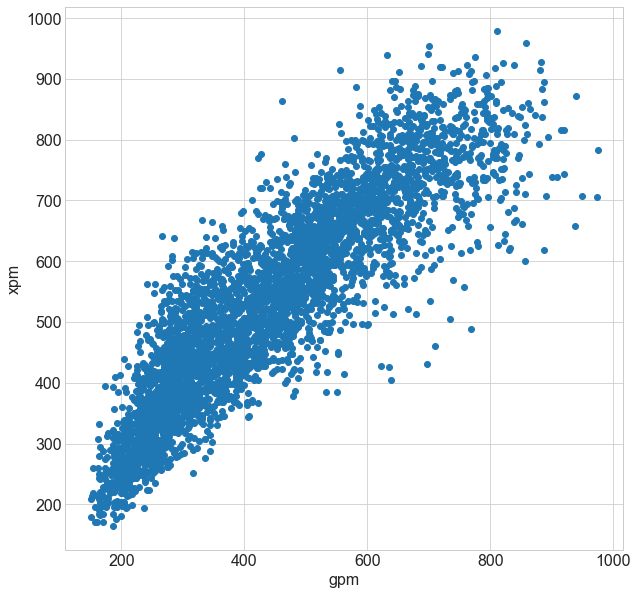

In [34]:
plt.figure(figsize=(10,10))
plt.plot(df['gpm'], df['xpm'], 'o')
plt.xlabel("gpm")
plt.ylabel("xpm")

In [35]:
# lets average over each hero to get one point per hero

In [36]:
df_mean = df.groupby(by='heroId')[['gpm','xpm']].mean()

In [37]:
df_mean = df_mean.merge(hero_map, 'inner', left_index=True, right_index=True)

In [38]:
df_mean.head(10)

gpm         xpm            hero
1   667.538462  726.846154       Anti-Mage
2   443.000000  517.600000             Axe
3   247.725888  343.274112            Bane
4   530.727273  625.303030     Bloodseeker
5   275.000000  388.333333  Crystal Maiden
6   580.652174  613.347826     Drow Ranger
7   313.866667  464.466667     Earthshaker
8   602.250000  652.750000      Juggernaut
9   331.717949  464.487179          Mirana
10  639.851852  687.259259       Morphling

In [39]:
df_mean.sort_values(by='gpm', ascending=True).head(5)

gpm         xpm                 hero
37  197.000000  246.500000              Warlock
91  245.849462  426.559140                   Io
3   247.725888  343.274112                 Bane
88  248.416667  393.958333         Nyx Assassin
90  253.000000  344.000000  Keeper of the Light

In [40]:
df_mean.sort_values(by='gpm', ascending=False).head(5)

gpm         xpm          hero
109  726.854167  613.020833   Terrorblade
56   699.666667  846.333333        Clinkz
89   695.333333  553.555556    Naga Siren
81   692.000000  706.000000  Chaos Knight
94   676.630435  665.043478        Medusa

In [41]:
df_mean.sort_values(by='xpm', ascending=True).head(5)

gpm         xpm                hero
37   197.000000  246.500000             Warlock
31   255.666667  297.666667                Lich
68   271.444444  334.222222  Ancient Apparition
111  269.000000  338.000000              Oracle
85   278.294118  340.529412             Undying

In [42]:
df_mean.sort_values(by='xpm', ascending=False).head(5)

gpm         xpm              hero
56  699.666667  846.333333            Clinkz
1   667.538462  726.846154         Anti-Mage
46  668.794872  725.987179  Templar Assassin
34  563.909091  712.454545            Tinker
25  619.135593  707.847458              Lina

In [43]:
# should add hero win rates (in DPC) here too
# add number of games too
# heros with 

In [44]:
# linear relationship
# can be replaced with a new variable
# \alpha = gpm + xpm
# relationship is linear at high values and
# non-linear at low values actually

In [45]:
df_mean['hero'].values[0]

'Anti-Mage'

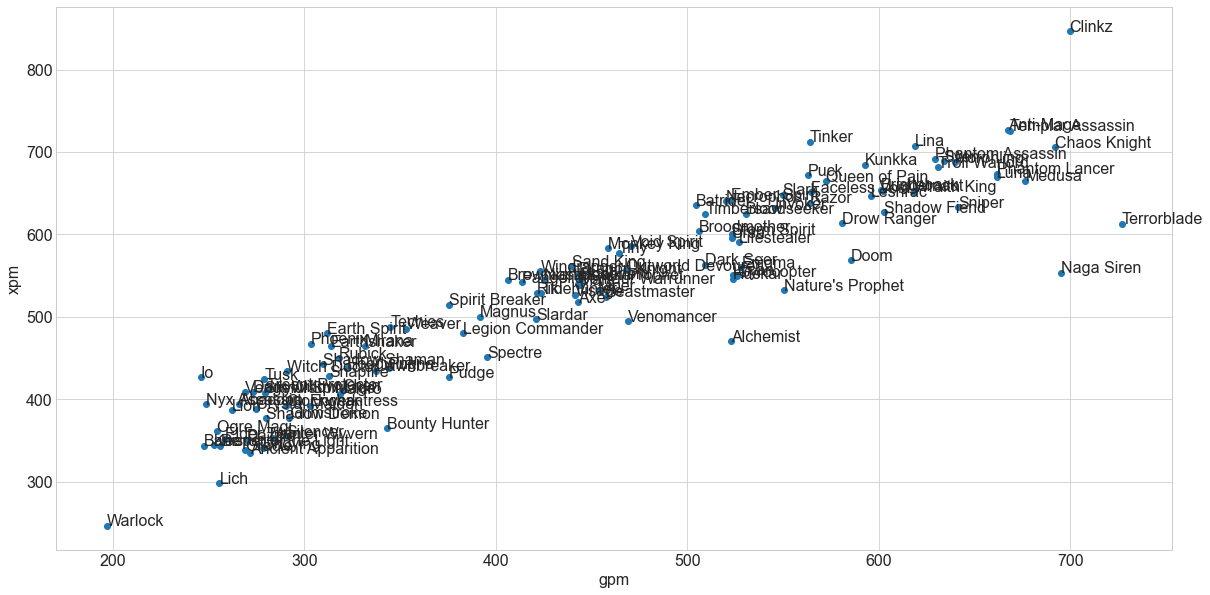

In [46]:
plt.figure(figsize=(20,10))
plt.plot(df_mean['gpm'], df_mean['xpm'], 'o')
plt.xlabel("gpm")
plt.ylabel("xpm")


for i in range(len(df_mean)):
    txt = df_mean['hero'].values[i]
    plt.annotate(txt, (df_mean['gpm'].values[i], df_mean['xpm'].values[i]))


In [47]:
df[df['heroId']==37]

heroId  gpm  xpm     matchid     hero
564      37  204  224  6307298604  Warlock
590      37  190  269  6309665349  Warlock